In [2]:
# Get helper_functions.py script from course GitHub
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py 

# Import helper functions we're going to use
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

--2021-10-25 07:12:22--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-10-25 07:12:22 (75.8 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
unzip_data('/content/drive/MyDrive/Eye data.zip')

In [5]:
walk_through_dir('New folder')

There are 2 directories and 0 images in 'New folder'.
There are 0 directories and 41946 images in 'New folder/Close eyes'.
There are 0 directories and 42952 images in 'New folder/Open eyes'.


In [6]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (149, 149)


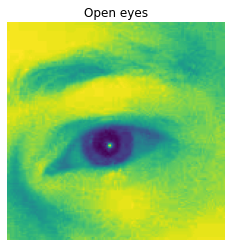

In [38]:
# View a random image 
img = view_random_image(target_dir="New folder/",
                        target_class="Open eyes")

In [8]:
train_dir = "New folder"

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255., validation_split=0.25)
# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42, subset='training' )

valid_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42, subset="validation", shuffle=False)

Found 63674 images belonging to 2 classes.
Found 21224 images belonging to 2 classes.


In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
model_0=Sequential([
    Conv2D(16,3,activation='relu',input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(32,3,activation='relu'),
    MaxPool2D(),
    Conv2D(32,3,activation='relu'),
    MaxPool2D(),
    Conv2D(64,3,activation='relu'),
    MaxPool2D(),


    Flatten(),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')
])

model_0.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics='accuracy')

history_0=model_0.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))

model_0.save('drow_siness model.h5')

Epoch 1/5
1990/1990 [==============================] - 136s 68ms/step - loss: 0.1591 - accuracy: 0.9399 - val_loss: 0.3197 - val_accuracy: 0.8958
Epoch 2/5
1990/1990 [==============================] - 136s 68ms/step - loss: 0.0706 - accuracy: 0.9761 - val_loss: 0.3335 - val_accuracy: 0.8987
Epoch 3/5
1990/1990 [==============================] - 134s 67ms/step - loss: 0.0473 - accuracy: 0.9839 - val_loss: 0.3702 - val_accuracy: 0.8789
Epoch 4/5
1990/1990 [==============================] - 134s 67ms/step - loss: 0.0381 - accuracy: 0.9865 - val_loss: 0.6227 - val_accuracy: 0.8310
Epoch 5/5
1990/1990 [==============================] - 134s 67ms/step - loss: 0.0318 - accuracy: 0.9891 - val_loss: 0.4432 - val_accuracy: 0.8745


In [12]:
model_0.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 52, 52, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 64)       

In [13]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [36]:
def pred_and_plot(model, filename):
  
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))
  pred=pred.round()
  if pred==0:
    pred_class="Open eyes"
  else:
    pred_class="Close eyes"  

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

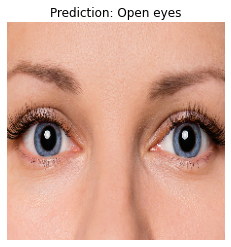

In [37]:
# Test our model 
pred_and_plot(model_0, "eyes.jpg")